# <center>Построение простейших моделей прогнозирования</center>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Загрузим и отобразим данные об объемах пассажирских авиаперевозок.

In [3]:
passengers = pd.read_csv('C:/Users/79811/anaconda3/passengers.csv', index_col='date', parse_dates=True)
print(passengers)

            num_passengers
date                      
1949-01-01             112
1949-02-01             118
1949-03-01             132
1949-04-01             129
1949-05-01             121
...                    ...
1960-08-01             606
1960-09-01             508
1960-10-01             461
1960-11-01             390
1960-12-01             432

[144 rows x 1 columns]


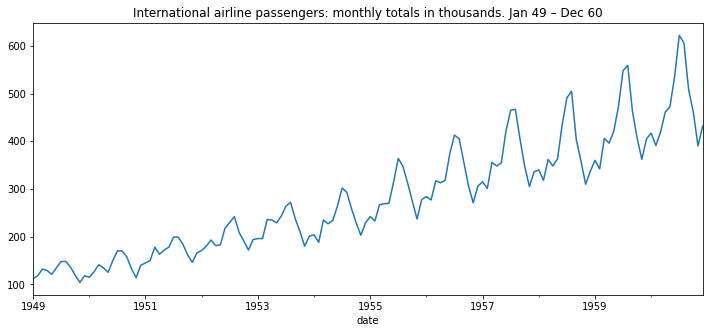

In [4]:
passengers['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

Временной ряд обладает трендом и годовой сезонностью, которые должны быть учтены при построении моделей прогнозирования. Наличие тренда и сезонности проявляется на коррелограмме. Для построения коррелограммы воспользуемся функцией `plot_acf` из библиотеки `statsmodels`.

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

Опция `lags` позволяет задавать количество лагов для вычисления значений автокорреляции.

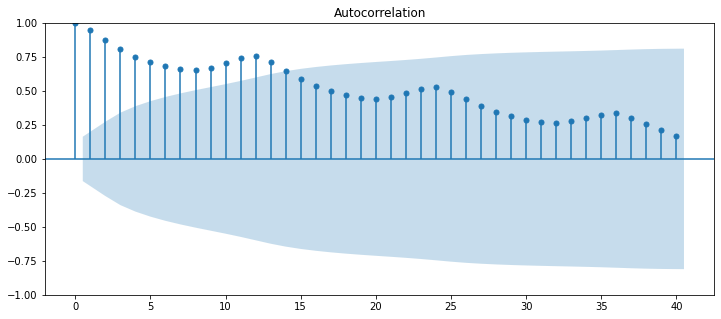

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(passengers['num_passengers'], lags=40, ax=ax)
plt.show()

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
Постройте наивную сезонную модель прогнозирования. Данная модель предполагает, что количество пассажиров в январе 1961 г. будет таким же, как и в январе 1960 г. С помощью полученной модели получите прогноз на 3 года вперед и отобразите результат на графике.
<p></p>
  
</div>

In [7]:
to_update = passengers.tail(12)
to_update.index = ['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01','1961-06-01','1961-07-01','1961-08-01','1961-09-01', '1961-10-01', '1961-11-01','1961-12-01']

In [8]:
passengers1 = passengers.append(to_update).tail(12)
print(passengers1)

            num_passengers
1961-01-01             417
1961-02-01             391
1961-03-01             419
1961-04-01             461
1961-05-01             472
1961-06-01             535
1961-07-01             622
1961-08-01             606
1961-09-01             508
1961-10-01             461
1961-11-01             390
1961-12-01             432


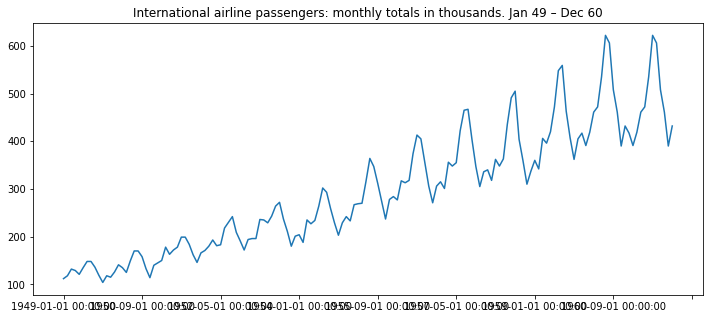

In [9]:
passengers.append(to_update)['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

In [10]:
l = passengers['num_passengers'].values[-12:]
print(l)

[417 391 419 461 472 535 622 606 508 461 390 432]


In [11]:
f = np.repeat(l, 3)
f = np.concatenate(f.reshape(12, 3).T)
f = pd.Series(f, index=pd.date_range(passengers.index[-1], periods=36, freq = 'M'), name='forecast')
print(f)

1960-12-31    417
1961-01-31    391
1961-02-28    419
1961-03-31    461
1961-04-30    472
1961-05-31    535
1961-06-30    622
1961-07-31    606
1961-08-31    508
1961-09-30    461
1961-10-31    390
1961-11-30    432
1961-12-31    417
1962-01-31    391
1962-02-28    419
1962-03-31    461
1962-04-30    472
1962-05-31    535
1962-06-30    622
1962-07-31    606
1962-08-31    508
1962-09-30    461
1962-10-31    390
1962-11-30    432
1962-12-31    417
1963-01-31    391
1963-02-28    419
1963-03-31    461
1963-04-30    472
1963-05-31    535
1963-06-30    622
1963-07-31    606
1963-08-31    508
1963-09-30    461
1963-10-31    390
1963-11-30    432
Freq: M, Name: forecast, dtype: int64


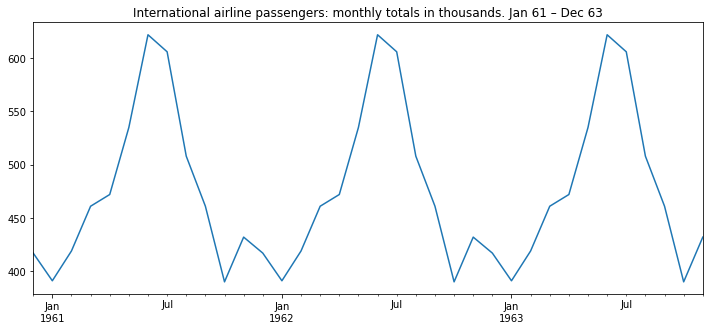

In [12]:
f.plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 61 – Dec 63')
plt.show()

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
Наивная сезонная модель прогнозирования не учитывает тренд временного ряда. Воспользуйтесь методом экстраполяции тренда, постройте прогноз также на 3 года и отобразите результат на графике.
    
<em>Комментарий: пока реализуйте только метод экстраполяции тренда! Не спешите объединять модели.</em>
<p></p>
  
</div>

In [13]:
l1 = passengers['num_passengers'].values
print(l1)

[112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149
 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166
 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243
 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229
 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374
 413 405 355 306 271 306 315 301 356 348 355 422 465 467 404 347 305 336
 340 318 362 348 363 435 491 505 404 359 310 337 360 342 406 396 420 472
 548 559 463 407 362 405 417 391 419 461 472 535 622 606 508 461 390 432]


In [14]:
l1[-1] + 1.5*(l1[-1] + l1[0])/(l1.size-1)

437.7062937062937

In [15]:
l1 = l1[-1] + 1.5*(l1[-1] + l1[0])/(l1.size-1)

In [26]:
i=l1.size

In [28]:
type (i)

int

In [31]:
i=l1.size
while i!=180:
    l1=np.append(l1, l1[-1] + 1.5*(l1[-1] + l1[0])/(l1.size-1))     
    i=i+1
print(l1)

IndexError: invalid index to scalar variable.

<div class="alert alert-info">

<h3> Задание 3</h3>
<p></p>
В результате выполнения предыдущих заданий вы получили две модели, каждая из которых описывает только одну из компонент ряда: либо тренд, либо сезонность. Попробуем их объединить. Для этого:
    <p></p>
    <li>вычтите из исходного ряда трендовую составляющую, постройте коррелограмму полученного ряда остатков;</li>
    <li>для ряда остатков постройте наивную сезонную модель.</li>
    
 Получите прогноз на 3 года вперед с помощью комбинации моделей. Результат отобразите на графике.
<p></p>
  
</div>

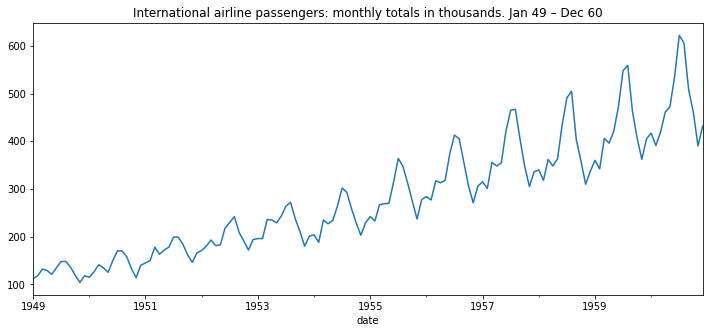

In [191]:
passengers['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

In [221]:
pasdiff = passengers.diff(periods = 1).dropna()

<AxesSubplot:xlabel='date'>

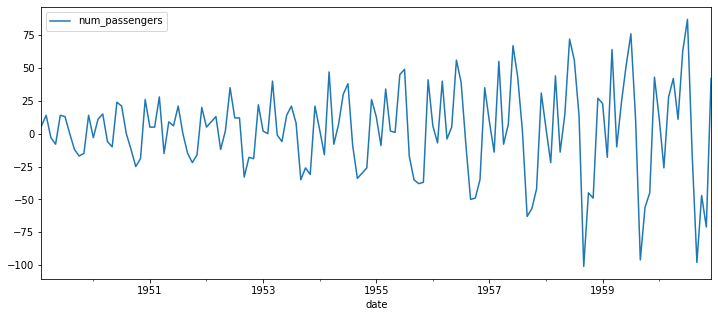

In [222]:
pasdiff.plot(figsize=(12,5))

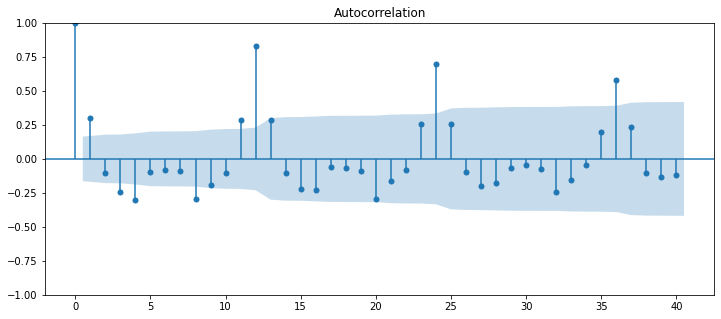

In [227]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(pasdiff, lags=40, ax=ax)
plt.show()

### Мультипликативная сезонность

Во временном ряду пассажирских авиаперевозок наблюдается **мультипликативная сезонность**, которая характеризуется увеличением амплитуды сезонных колебаний. В случае когда амплитуда сезонных колебаний не меняется, говорят об **аддитивной сезонности**.

Ряд с трендом и аддитивной сезонностью может быть представлен в виде суммы его компонент:

$$y(t)=b(t)+s(t)+\epsilon(t),$$

где $b(t)$ &ndash; трендовая, $s(t)$ &ndash; сезонная, а $\epsilon(t)$ &ndash; случайная компоненты ряда.

Ряд с мультипликативной сезонностью представляет собой произведение данных компонент:

$$y(t)=b(t)\times s(t)\times \epsilon(t).$$

<div class="alert alert-info">

<h3> Задание 4</h3>
<p></p>
Постройте мультипликативную модель прогнозирования, получите прогноз на 3 года вперед и отобразите результат на графике. Также, для сравнения, отобразите на графике прогноз модели из предыдущего задания.
<p></p>
  
</div>

In [32]:
k = passengers['num_passengers'].values
print(k)

[112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149
 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166
 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243
 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229
 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374
 413 405 355 306 271 306 315 301 356 348 355 422 465 467 404 347 305 336
 340 318 362 348 363 435 491 505 404 359 310 337 360 342 406 396 420 472
 548 559 463 407 362 405 417 391 419 461 472 535 622 606 508 461 390 432]


In [33]:
f = np.repeat(l, 3)
print(f)

[417 417 417 391 391 391 419 419 419 461 461 461 472 472 472 535 535 535
 622 622 622 606 606 606 508 508 508 461 461 461 390 390 390 432 432 432]


In [270]:
f*l*0.05

ValueError: operands could not be broadcast together with shapes (540,) (36,) 

In [274]:
l2 = np.append(l, f*l1 *0.5)

ValueError: operands could not be broadcast together with shapes (540,) (0,) 

ValueError: x and y must have same first dimension, but have shapes (180,) and (216,)

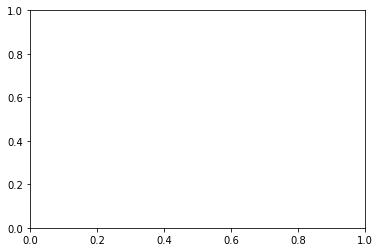

In [262]:
plt.plot(np.arange(0,180),l2)